In [86]:
import pandas as pd
import matplotlib.pyplot as plt

In [87]:
df = pd.read_csv('Chicago_Public_Schools_-_Progress_Report_Cards__2011-2012_.csv')

In [88]:
df.head(2)

,School ID,Name of School,"Elementary, Middle, or High School",Street Address,City,State,ZIP Code,Phone Number,Link,Network Manager,...,RCDTS Code,X_COORDINATE,Y_COORDINATE,Latitude,Longitude,Community Area Number,Community Area Name,Ward,Police District,Location
0,609966,Charles G Hammond Elementary School,ES,2819 W 21st Pl,Chicago,IL,60623,(773) 535-4580,http://schoolreports.cps.edu/SchoolProgressRep...,Pilsen-Little Village Elementary Network,...,150000000000000,1157809.015,1889554.623,41.852691,-87.696278,30,SOUTH LAWNDALE,12,10,"(41.85269133, -87.69627777)"
1,610539,Marvin Camras Elementary School,ES,3000 N Mango Ave,Chicago,IL,60634,(773) 534-2960,http://schoolreports.cps.edu/SchoolProgressRep...,Fullerton Elementary Network,...,150000000000000,1137482.296,1919394.900,41.934966,-87.770165,19,BELMONT CRAGIN,30,25,"(41.93496641, -87.77016525)"


In [89]:
df.drop(['School ID', 'Name of School','Street Address', 'City', 'State', 'ZIP Code', 'Phone Number', 'Link ',
        'Network Manager', 'Collaborative Name', 'Adequate Yearly Progress Made? ',
        'Safety Icon ', 'Family Involvement Icon', 'Environment Icon ', 'Instruction Icon ',
         'Leaders Icon ', 'Leaders Icon ','Teachers Icon ', 'Parent Engagement Icon ',
         'Parent Environment Icon', 'RCDTS Code', 'Ward','Police District',
       'X_COORDINATE', 'Y_COORDINATE', 'Latitude', 'Longitude',
       'Community Area Number', 'Community Area Name', 'Location'], axis=1, inplace=True)

In [90]:
df.columns

Index(['Elementary, Middle, or High School', 'Track Schedule',
       'CPS Performance Policy Status', 'CPS Performance Policy Level',
       'Healthy Schools Certified?', 'Safety Score',
       'Family Involvement Score', 'Environment Score', 'Instruction Score',
       'Leaders Score ', 'Teachers Score', 'Parent Engagement Score',
       'Parent Environment Score', 'Average Student Attendance',
       'Rate of Misconducts (per 100 students) ', 'Average Teacher Attendance',
       'Individualized Education Program Compliance Rate ', 'Pk-2 Literacy %',
       'Pk-2 Math %', 'Gr3-5 Grade Level Math %', 'Gr3-5 Grade Level Read % ',
       'Gr3-5 Keep Pace Read %', 'Gr3-5 Keep Pace Math %',
       'Gr6-8 Grade Level Math %', 'Gr6-8 Grade Level Read %',
       'Gr6-8 Keep Pace Math%', 'Gr6-8 Keep Pace Read %',
       'Gr-8 Explore Math %', 'Gr-8 Explore Read %', 'ISAT Exceeding Math %',
       'ISAT Exceeding Reading % ', 'ISAT Value Add Math',
       'ISAT Value Add Read', 'ISAT Value Add

In [91]:
high_school = ['Elementary, Middle, or High School', 'CPS Performance Policy Status', 'CPS Performance Policy Level', 'Safety Score',
       'Environment Score', 'Instruction Score',
       'Leaders Score ', 'Teachers Score', 'Parent Engagement Score',
       'Parent Environment Score', 'Average Student Attendance',
       'Rate of Misconducts (per 100 students) ', 'Average Teacher Attendance',
       '9th Grade EXPLORE (2009) ', '9th Grade EXPLORE (2010) ', '10th Grade PLAN (2009) ',
       '10th Grade PLAN (2010) ', 'Net Change EXPLORE and PLAN',
       '11th Grade Average ACT (2011) ', 'Net Change PLAN and ACT',
       'College Eligibility %', 'Graduation Rate %',
       'College Enrollment Rate %', 'College Enrollment (number of students) ',
       'General Services Route ', 'Freshman on Track Rate %']

high_school = df[high_school]
high_school = high_school[high_school["Elementary, Middle, or High School"] == 'HS']
high_school.to_csv('high_school.csv', index=False)

In [92]:
high_school.head(2)

,"Elementary, Middle, or High School",CPS Performance Policy Status,CPS Performance Policy Level,Safety Score,Environment Score,Instruction Score,Leaders Score,Teachers Score,Parent Engagement Score,Parent Environment Score,...,10th Grade PLAN (2010),Net Change EXPLORE and PLAN,11th Grade Average ACT (2011),Net Change PLAN and ACT,College Eligibility %,Graduation Rate %,College Enrollment Rate %,College Enrollment (number of students),General Services Route,Freshman on Track Rate %
8,HS,Not on Probation,Level 1,98.0,80.0,77.0,NDA,NDA,NDA,NDA,...,23.2,2,27,3.9,96.4,96.9,82.4,881,33,90.7
15,HS,Probation,Level 3,41.0,43.0,31.0,19,32,NDA,NDA,...,13,0.8,13.8,0.5,6.7,49,51.9,599,37,59.3


In [93]:
samples = ['Safety Score','Environment Score', 'Instruction Score', 'Freshman on Track Rate %']
samples = high_school[samples]

In [94]:
samples.head(12)

,Safety Score,Environment Score,Instruction Score,Freshman on Track Rate %
8,98.0,80.0,77.0,90.7
15,41.0,43.0,31.0,59.3
17,99.0,99.0,88.0,95.9
28,NaN,NaN,NaN,78.2
30,50.0,61.0,62.0,91.4
35,40.0,25.0,38.0,73.3
36,41.0,42.0,43.0,71.1
38,20.0,18.0,29.0,67.1
39,13.0,28.0,28.0,69.5
48,38.0,45.0,53.0,56.1


In [95]:
labels

NameError: name 'labels' is not defined

In [96]:
print(samples.isna().any().any())  # Returns True if there are any missing values, False otherwise

True


In [97]:
print(samples.isna().any())  # Returns a Series indicating whether there are missing values in each column

Safety Score                 True
Environment Score            True
Instruction Score            True
Freshman on Track Rate %    False
dtype: bool


In [98]:
samples = samples.fillna(0)

In [99]:
print(samples.isna().sum())


Safety Score                0
Environment Score           0
Instruction Score           0
Freshman on Track Rate %    0
dtype: int64


In [100]:
samples.head(12)

,Safety Score,Environment Score,Instruction Score,Freshman on Track Rate %
8,98.0,80.0,77.0,90.7
15,41.0,43.0,31.0,59.3
17,99.0,99.0,88.0,95.9
28,0.0,0.0,0.0,78.2
30,50.0,61.0,62.0,91.4
35,40.0,25.0,38.0,73.3
36,41.0,42.0,43.0,71.1
38,20.0,18.0,29.0,67.1
39,13.0,28.0,28.0,69.5
48,38.0,45.0,53.0,56.1


In [101]:
import numpy as np
samples = np.where(samples == 'NDA', -1, samples)

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [42.5, 42.5, 72.5, 72.5],
  [25.0, 25.0, 57.5, 57.5],
  [95.0, 95.0, 105.0, 105.0],
  [115.0, 115.0, 125.0, 125.0],
  [135.0, 135.0, 145.0, 145.0],
  [120.0, 120.0, 140.0, 140.0],
  [165.0, 165.0, 175.0, 175.0],
  [185.0, 185.0, 195.0, 195.0],
  [170.0, 170.0, 190.0, 190.0],
  [155.0, 155.0, 180.0, 180.0],
  [130.0, 130.0, 167.5, 167.5],
  [100.0, 100.0, 148.75, 148.75],
  [215.0, 215.0, 225.0, 225.0],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [220.0, 220.0, 242.5, 242.5],
  [205.0, 205.0, 231.25, 231.25],
  [124.375, 124.375, 218.125, 218.125],
  [41.25, 41.25, 171.25, 171.25],
  [10.0, 10.0, 106.25, 106.25],
  [265.0, 265.0, 275.0, 275.0],
  [285.0, 285.0, 295.0, 295.0],
  [270.0, 270.0, 290.0, 290.0],
  [305.0, 305.0, 315.0, 315.0],
  [345.0, 345.0, 355.0, 355.0],
  [335.0, 335.0, 350.0, 350.0],
  [325.0, 325.0,

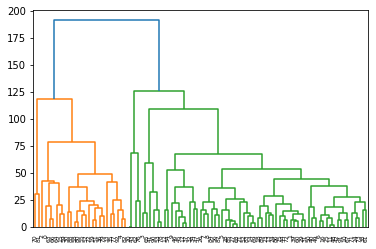

In [102]:
from scipy.cluster.hierarchy import linkage,dendrogram
mergings = linkage(samples, method='complete')
dendrogram(mergings, leaf_rotation=90,leaf_font_size=6)

## Logistic Regression

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [104]:
samples.column

AttributeError: 'numpy.ndarray' object has no attribute 'column'

In [105]:
X = samples[['Safety Score ', 'Environment Score ']]
y = samples['Freshman on Track Rate %']

C:\Users\Owner\AppData\Local\Temp/ipykernel_704/237300186.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  X = samples[['Safety Score ', 'Environment Score ']]


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices